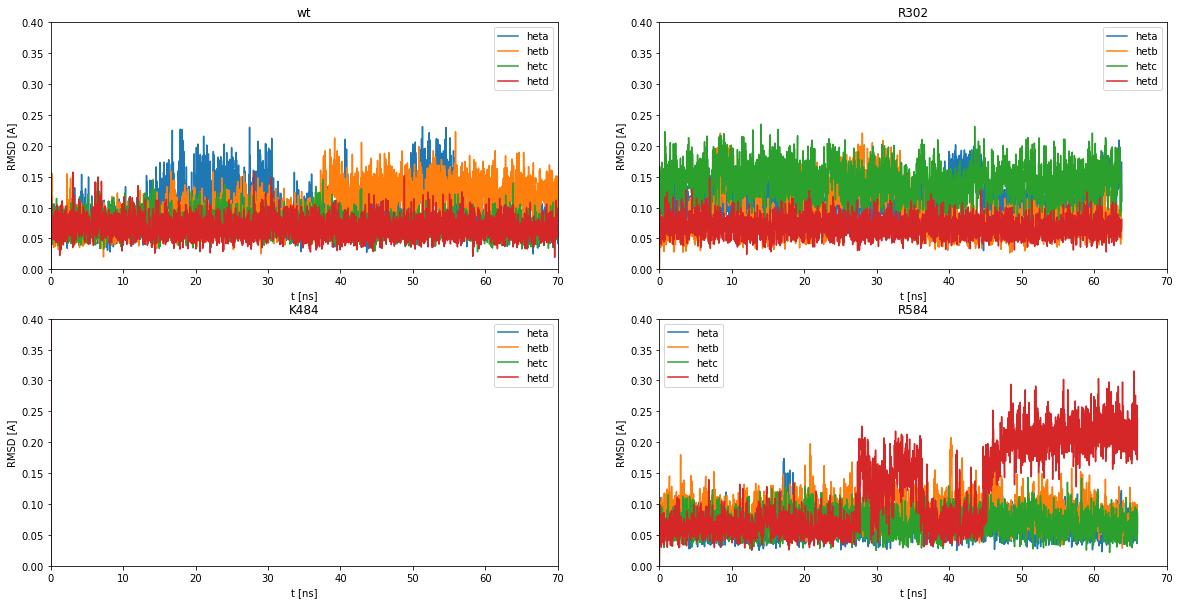

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy.random import multivariate_normal

D=["wt","R302","K484","R584"];
fileName=["a","b","c","d"];
fig, axs = plt.subplots(2,2,figsize=(20,10))

fileBase='/rmsd_het'


for ax,d in zip(axs.flat[0:],D):
    for seg in fileName:
        fileData=d + fileBase + seg+".dat";
        x,y=np.loadtxt(fileData,usecols=(0, 1), unpack=True);
        #ax.set_title(r'density' % d)
        ax.plot(x*0.02, y,label="het{0}".format(seg))
    ax.legend()
    ax.set_xlabel('t [ns]')
    ax.set_ylabel('RMSD [A]')
    ax.set_title(d)
    ax.set_xlim([0, 70])
    ax.set_ylim([0, 0.4])
plt.savefig("./RMSD.png")
plt.show()

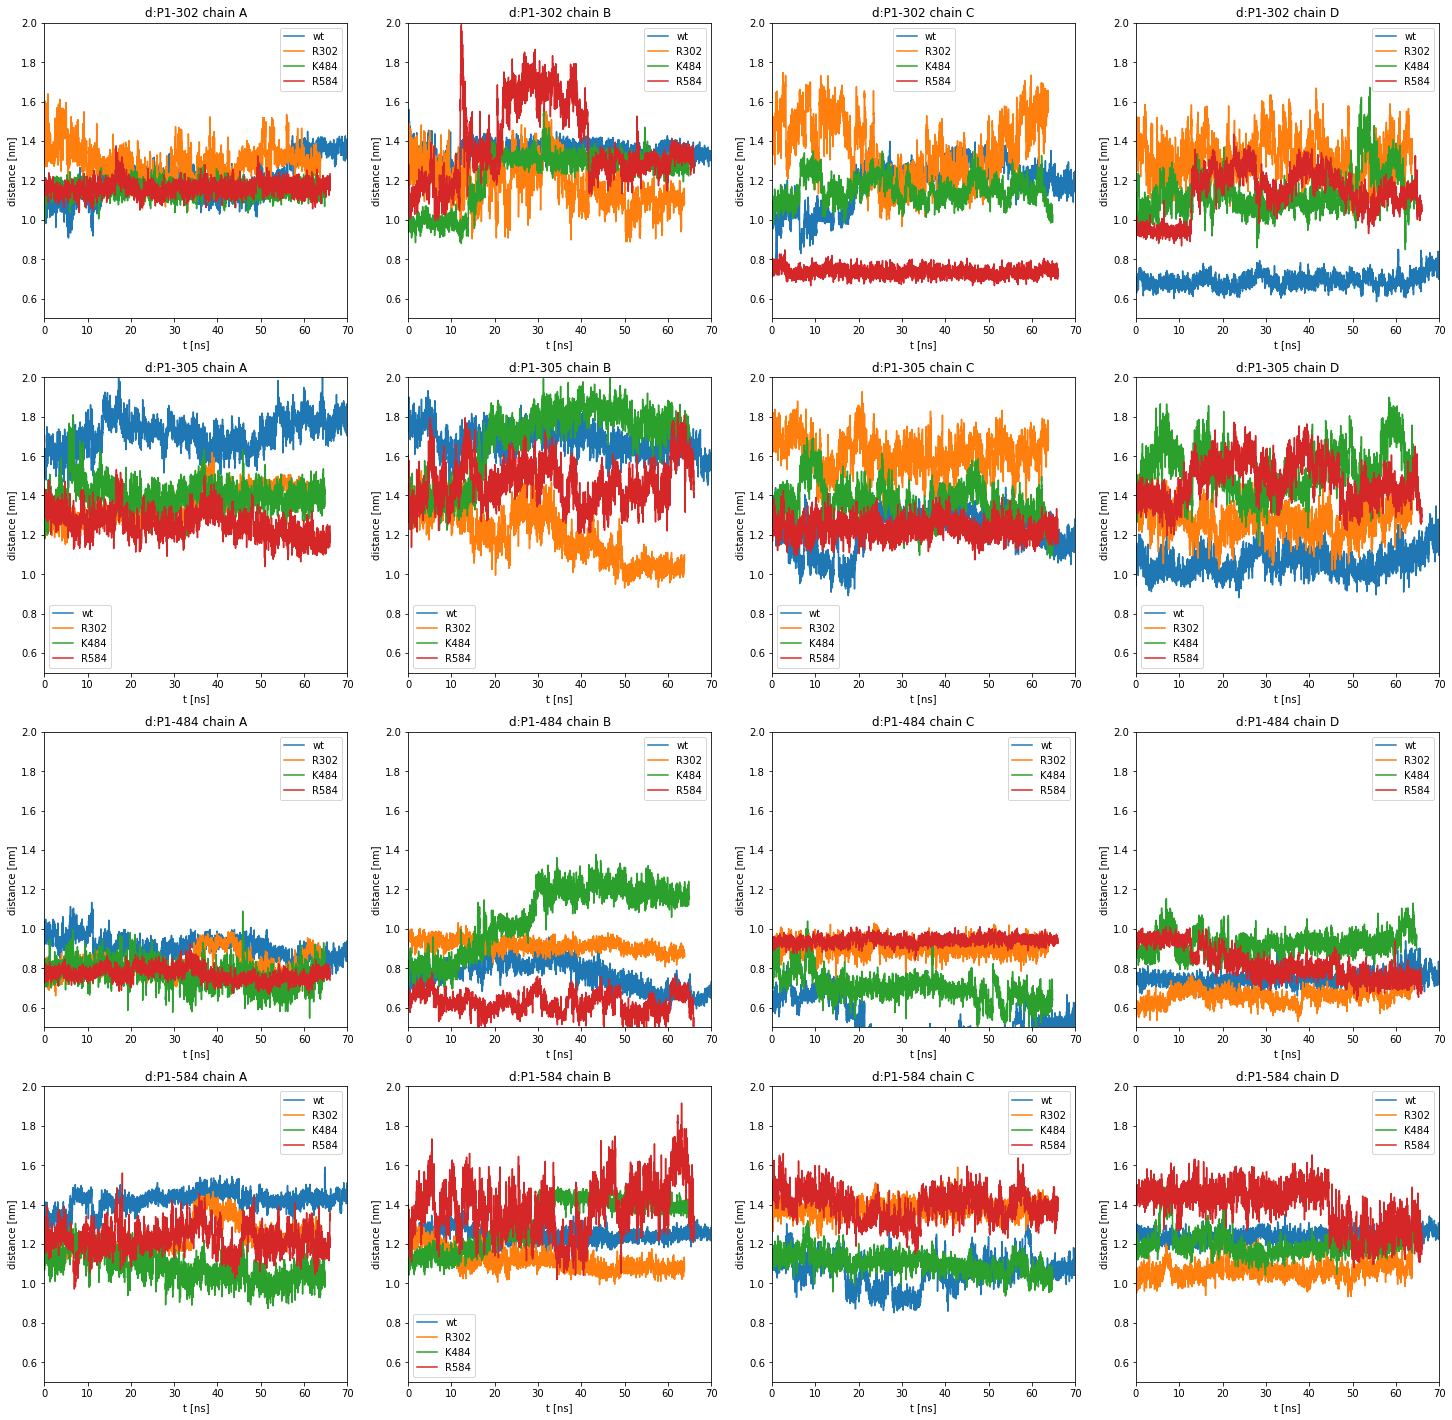

In [2]:
D=["wt","R302","K484","R584"];
fileName=["A","B","C","D"];
residue=["302","305","484","584"]
fileBase='/d_het'


fig, axs = plt.subplots(4,4,figsize=(25,25))
for r,k in zip(residue,range(len(residue))):
    for ax,seg in zip(axs.flat[k*4:],fileName):
            for d in D:
                fileData= d + fileBase + seg+ "_"+ r +"_P1.dat";
                x,y=np.loadtxt(fileData,usecols=(0, 1), unpack=True);
                ax.plot(x*0.02, y*0.1,label="{0}".format(d));
            ax.legend()
            ax.set_xlabel('t [ns]')
            ax.set_ylabel('distance [nm]')
            ax.set_title("d:P1-"+r+" chain "+seg)
            ax.set_xlim([0, 70])
            ax.set_ylim([0.5, 2])
plt.savefig("./dis_all_P1.png")
plt.show()

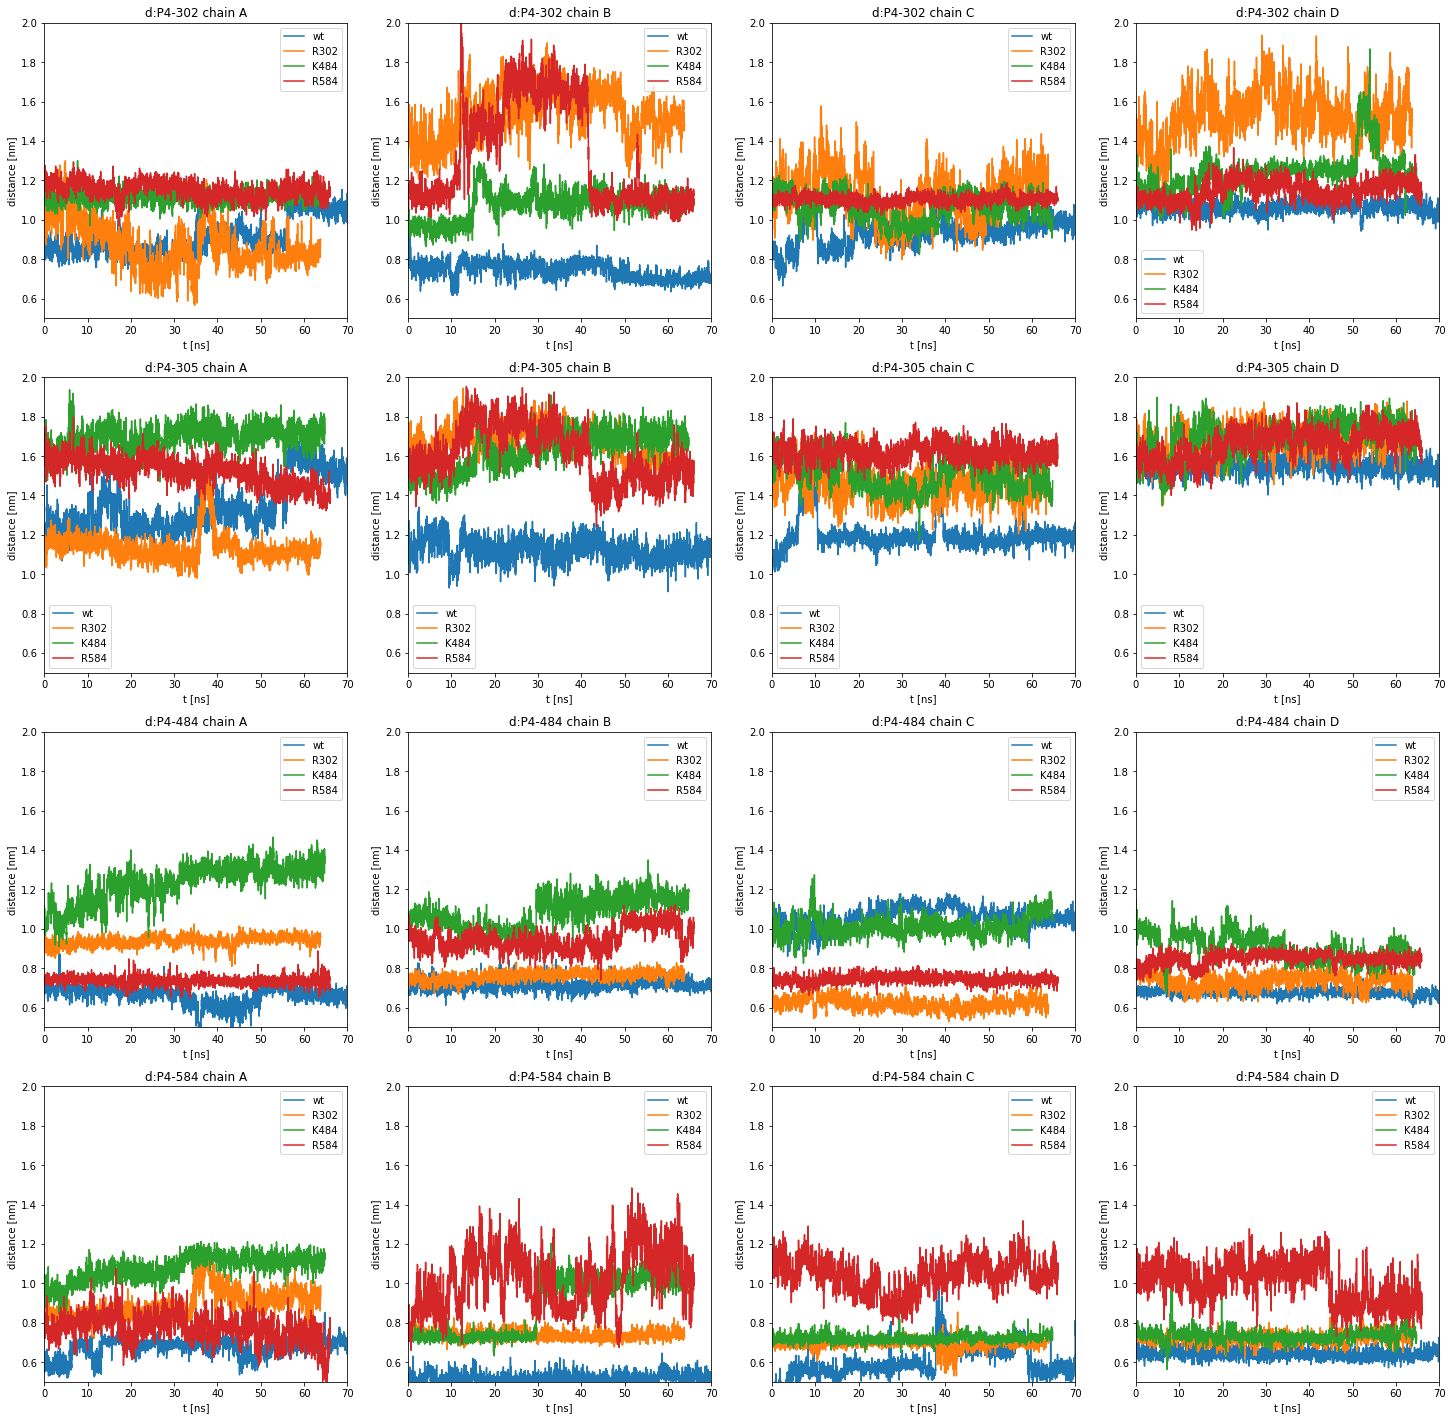

In [3]:
fig, axs = plt.subplots(4,4,figsize=(25,25))
for r,k in zip(residue,range(len(residue))):
    for ax,seg in zip(axs.flat[k*4:],fileName):
            for d in D:
                fileData= d + fileBase + seg+ "_"+ r +"_P4.dat";
                x,y=np.loadtxt(fileData,usecols=(0, 1), unpack=True);
                ax.plot(x*0.02, y*0.1,label="{0}".format(d));
            ax.legend()
            ax.set_xlabel('t [ns]')
            ax.set_ylabel('distance [nm]')
            ax.set_title("d:P4-"+r+" chain "+seg)
            ax.set_xlim([0, 70])
            ax.set_ylim([0.5, 2])
plt.savefig("./dis_all_P4.png")
plt.show()

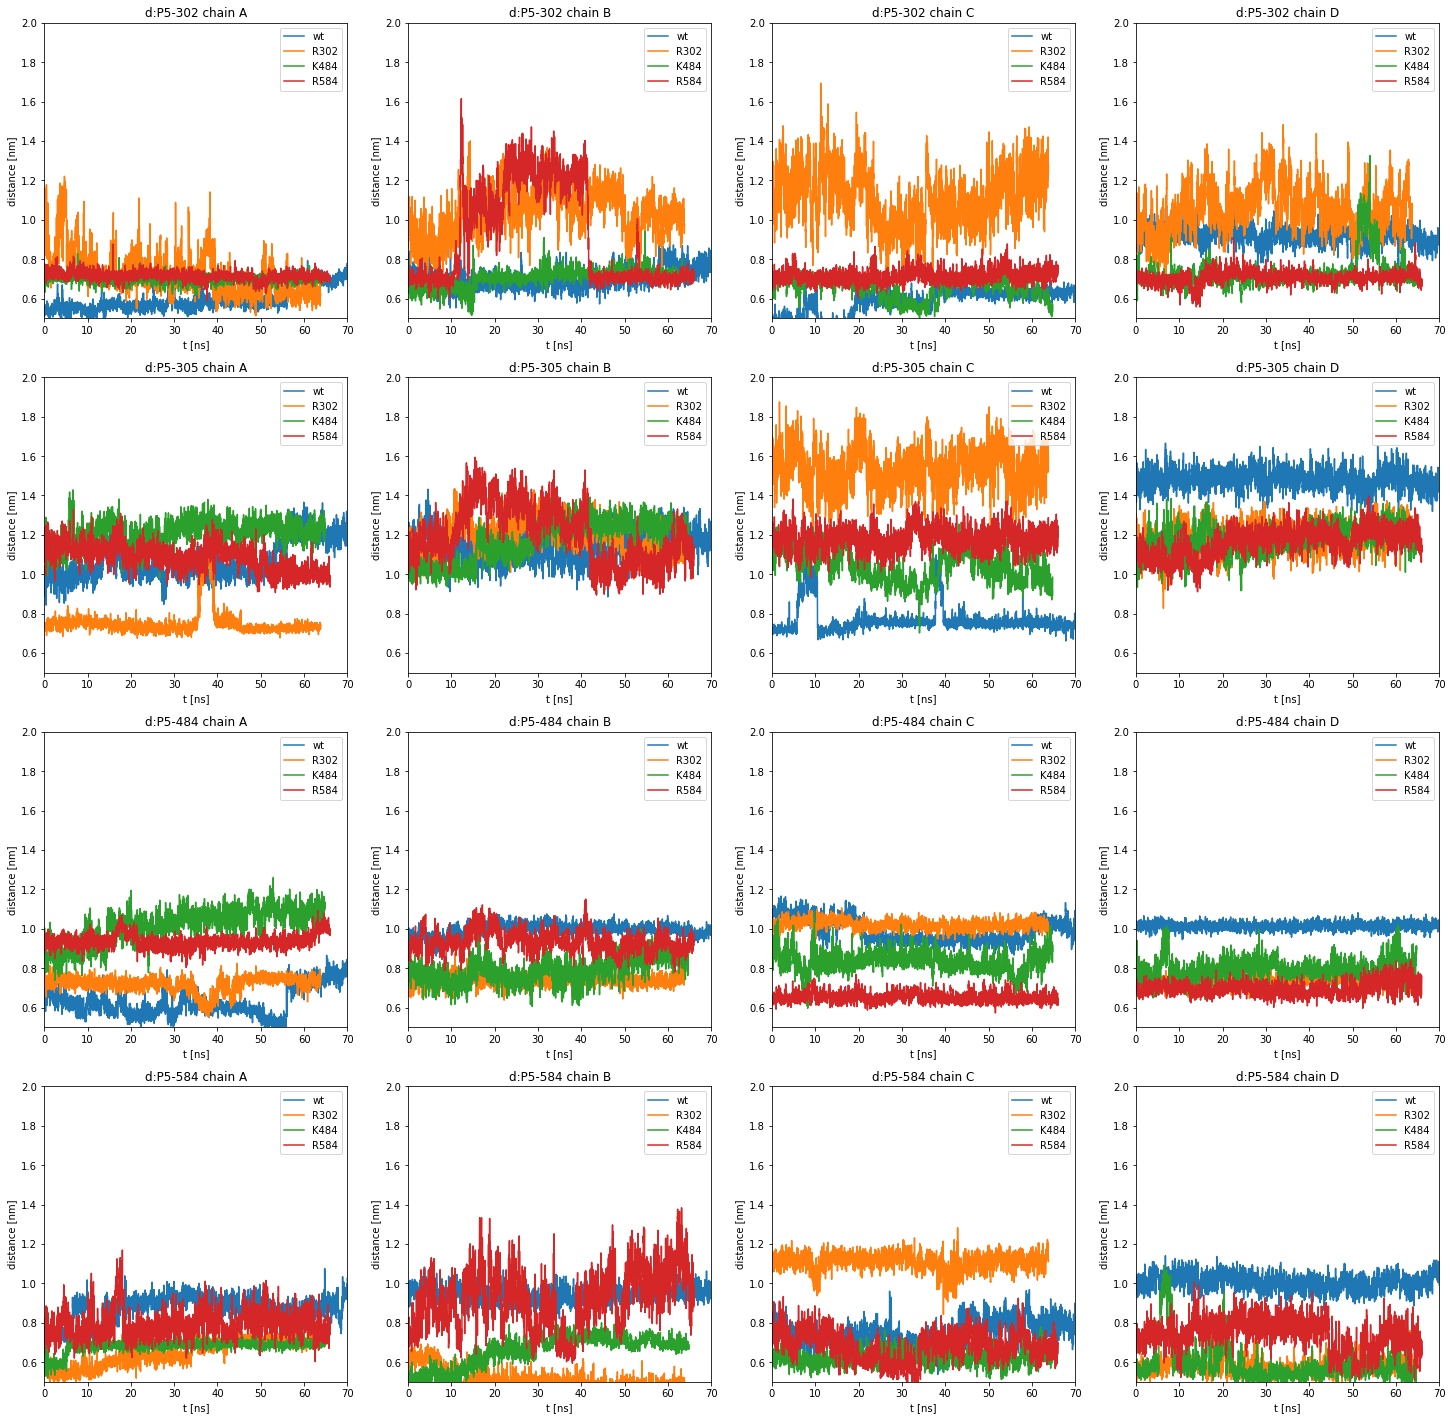

In [4]:
fig, axs = plt.subplots(4,4,figsize=(25,25))
for r,k in zip(residue,range(len(residue))):
    for ax,seg in zip(axs.flat[k*4:],fileName):
            for d in D:
                fileData= d + fileBase + seg+ "_"+ r +"_P5.dat";
                x,y=np.loadtxt(fileData,usecols=(0, 1), unpack=True);
                ax.plot(x*0.02, y*0.1,label="{0}".format(d));
            ax.legend()
            ax.set_xlabel('t [ns]')
            ax.set_ylabel('distance [nm]')
            ax.set_title("d:P5-"+r+" chain "+seg)
            ax.set_xlim([0, 70])
            ax.set_ylim([0.5, 2])
plt.savefig("./dis_all_P5.png")
plt.show()

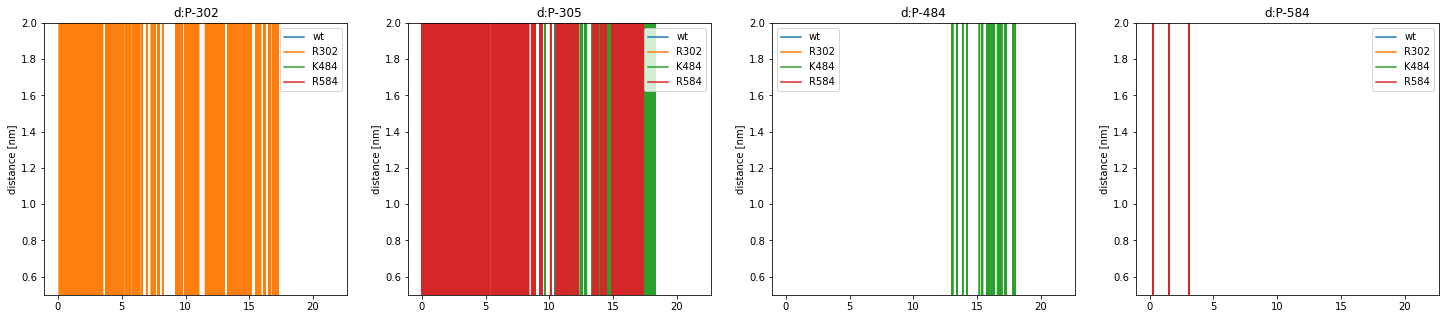

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy.random import multivariate_normal

D=["wt","R302","K484","R584"];
fileName=["19","20","21","22"];
residue=["302","305","484","584"]
fileBase='/mindist/numcont_'

fig, axs = plt.subplots(1,4,figsize=(25,5))

for ax,fn,r in zip(axs.flat[0:],fileName,residue):
            for d in D:
                fileData= d + fileBase +  fn +".xvg";
                x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
                ax.plot(x*0.02, y*10,label="{0}".format(d));
                ax.legend()
           # ax.set_xlabel('t [ns]')
            ax.set_ylabel('distance [nm]')
            ax.set_title("d:P-"+r)
           # ax.set_xlim([0, 70])
            ax.set_ylim([0.5, 2])
plt.savefig("./count_allP_res.png")
plt.show()

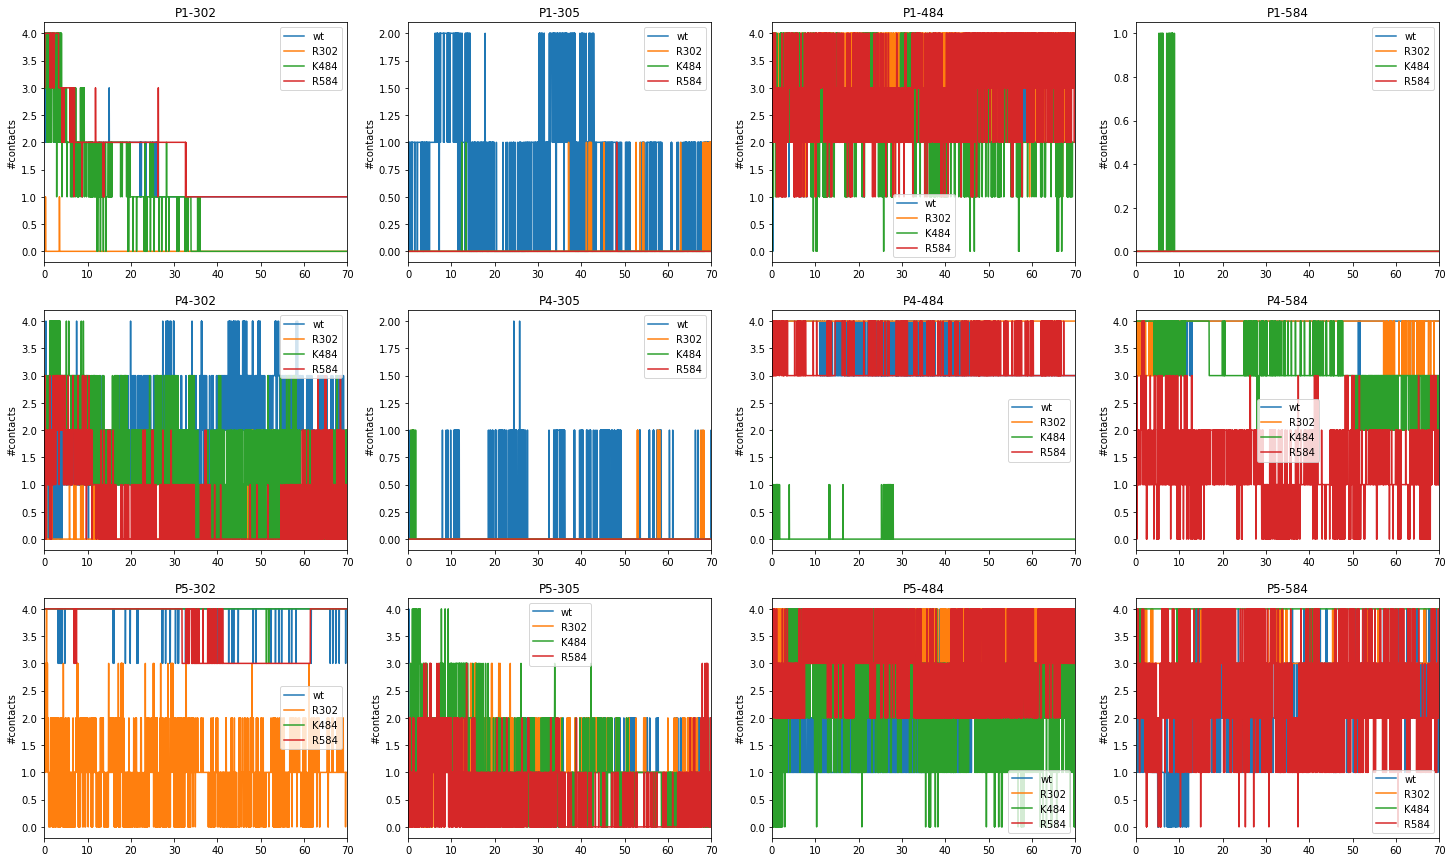

In [6]:
D=["wt","R302","K484","R584"];
fileName=["19","20","21","22"];
residue=["302","305","484","584"]
fileBase='/mindist/numcont_'
phosphate=["P1","P4","P5"]
fig, axs = plt.subplots(3,4,figsize=(25,15))
for p in range(len(phosphate)):
    for ax,fn,r in zip(axs.flat[p*4:],fileName,residue):
            for d in D:
                fileData= d + fileBase + phosphate[p] +"_"+ fn +".xvg";
             #   print(fileData)
                x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
                ax.plot(x*0.2, y,label="{0}".format(d));
                ax.legend()
           # ax.set_xlabel('t [ns]')
                ax.set_ylabel('#contacts')
                ax.set_title(phosphate[p]+"-"+r)
                ax.set_xlim([0, 70])
            #ax.set_ylim([0.5, 2])
plt.savefig("./count_P_res.png")
plt.show()

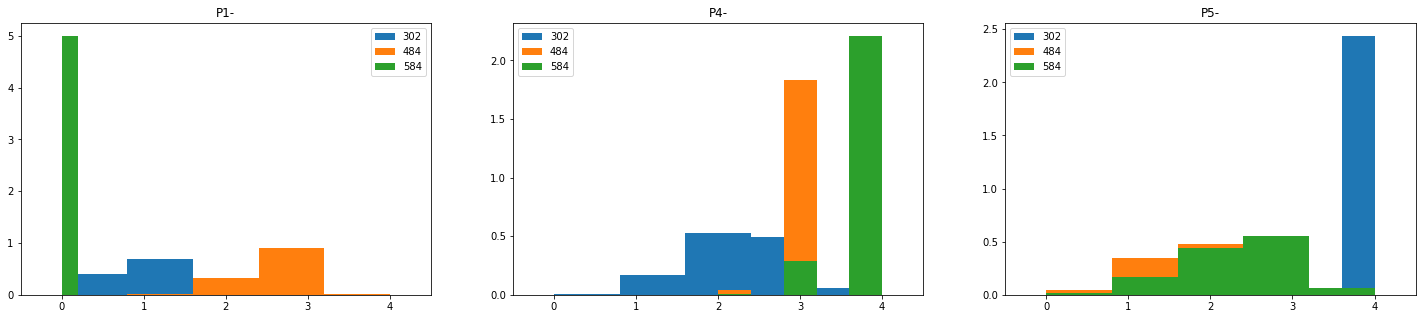

In [7]:
from scipy import stats
Dm=["wt","R302","K484","R584"]; #mutants
fileName=["19","21","22"]; #residues
residue=["302","484","584"]
fileBase='/mindist/numcont_'
phosphate=["P1","P4","P5"]
fig, axs = plt.subplots(1,3,figsize=(25,5))


d="wt"
contact=[];
for ax,p in zip(axs.flat[0:],range(len(phosphate))):
    for fn,r in zip(fileName,residue):
            fileData= d + fileBase + phosphate[p]+"_"+ fn +".xvg";
            x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
            ax.hist(y,bins=5,density=True,label=r, rwidth=1);
            contact.append({phosphate[p],np.average(y),d,r})
            ax.legend()
            ax.set_title(phosphate[p]+"-")
            ax.set_xlim([-0.5,4.5 ])
plt.show()

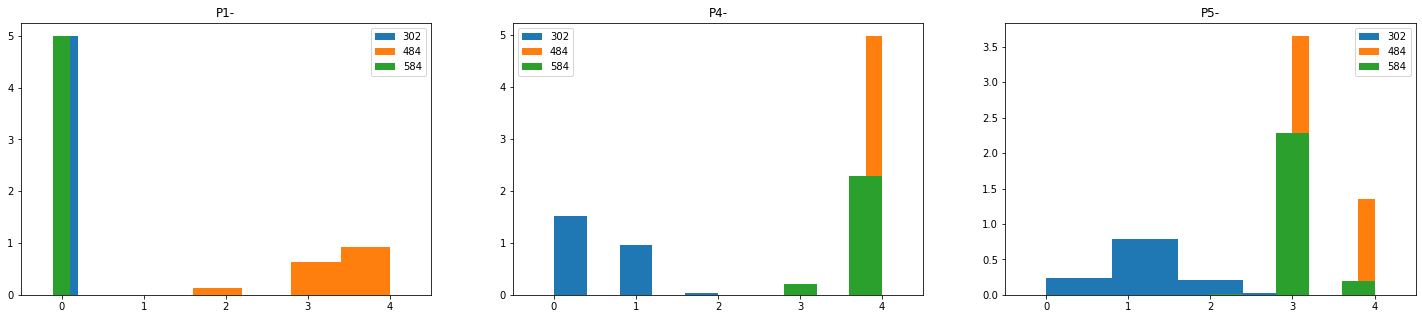

In [8]:
Dm=["wt","R302","K484","R584"]; #mutants
fileName=["19","21","22"]; #residues
residue=["302","484","584"]
fileBase='/mindist/numcont_'
phosphate=["P1","P4","P5"]
fig, axs = plt.subplots(1,3,figsize=(25,5))
d="R302"
for ax,p in zip(axs.flat[0:],range(len(phosphate))):
    for fn,r in zip(fileName,residue):
            fileData= d + fileBase + phosphate[p]+"_"+ fn +".xvg";
            x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
            ax.hist(y,bins=5,density=True,label=r, rwidth=1);
            contact.append({phosphate[p],np.average(y),d,r})
            ax.legend()
            ax.set_title(phosphate[p]+"-")
            ax.set_xlim([-0.5,4.5 ])
plt.show()

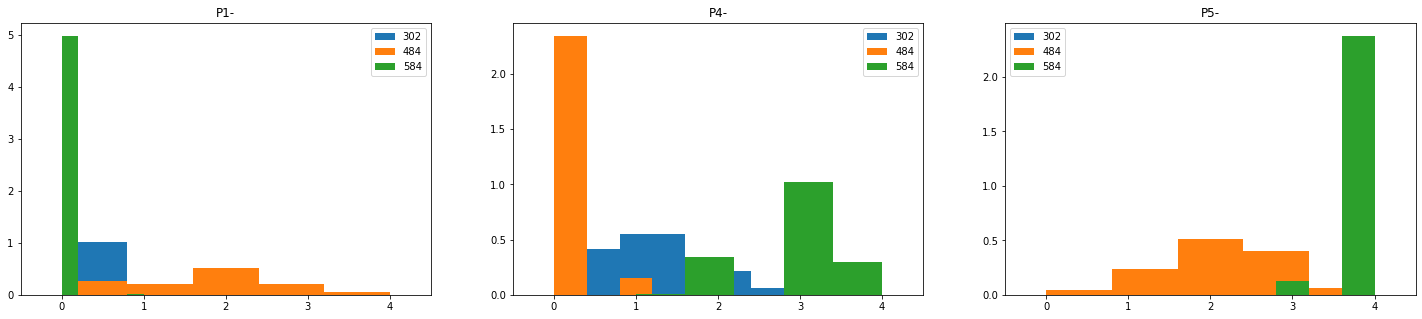

In [9]:
Dm=["wt","R302","K484","R584"]; #mutants
fileName=["19","21","22"]; #residues
residue=["302","484","584"]
fileBase='/mindist/numcont_'
phosphate=["P1","P4","P5"]
fig, axs = plt.subplots(1,3,figsize=(25,5))
d="K484"
for ax,p in zip(axs.flat[0:],range(len(phosphate))):
    for fn,r in zip(fileName,residue):
            fileData= d + fileBase + phosphate[p]+"_"+ fn +".xvg";
            x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
            ax.hist(y,bins=5,density=True,label=r, rwidth=1);
            contact.append({phosphate[p],np.average(y),d,r})
            ax.legend()
            ax.set_title(phosphate[p]+"-")
            ax.set_xlim([-0.5,4.5 ])
            #ax.set_ylim([0.5, 2])
#plt.savefig("./count_P_res.png")
#print(contact)
plt.show()

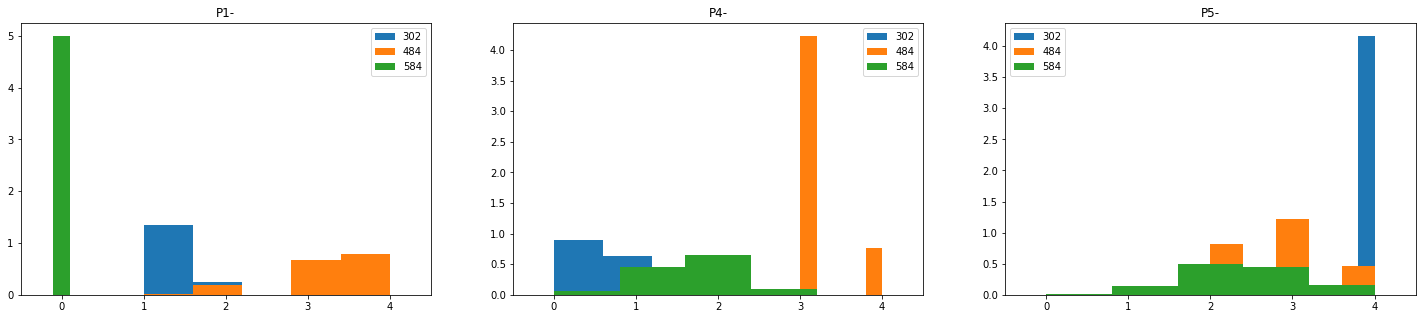

In [10]:
fileName=["19","21","22"]; #residues
residue=["302","484","584"]
fileBase='/mindist/numcont_'
phosphate=["P1","P4","P5"]
fig, axs = plt.subplots(1,3,figsize=(25,5))
d="R584"
for ax,p in zip(axs.flat[0:],range(len(phosphate))):
    for fn,r in zip(fileName,residue):
            fileData= d + fileBase + phosphate[p]+"_"+ fn +".xvg";
            x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
            ax.hist(y,bins=5,density=True,label=r, rwidth=1);
            contact.append({phosphate[p],np.average(y),d,r})
            ax.legend()
            ax.set_title(phosphate[p]+"-")
            ax.set_xlim([-0.5,4.5 ])
            #ax.set_ylim([0.5, 2])
#plt.savefig("./count_P_res.png")
#print(contact)
plt.show()

In [22]:
Dm=["wt","R302","K484","R584"]; #mutants
ileName=["19","21","22"]; #residues
residue=["302","484","584"]
fileBase='/mindist/numcont_'
phosphate=["P1","P4","P5"]
d="wt"
c=[];
for p in range(len(phosphate)):
    for fn,r in zip(fileName,residue):
            fileData= d + fileBase + phosphate[p]+"_"+ fn +".xvg";
            x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
            a=np.average(y);
            c.append(a);   
print("wt",sum(c))
wt=[[c[0],c[1],c[2]],[c[3],c[4],c[5]],[c[6],c[7],c[8]]]
d="R302"
c=[];
for p in range(len(phosphate)):
    for fn,r in zip(fileName,residue):
            fileData= d + fileBase + phosphate[p]+"_"+ fn +".xvg";
            x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
            a=np.average(y);
            c.append(a);   
print("R302",sum(c))
R302=[[c[0],c[1],c[2]],[c[3],c[4],c[5]],[c[6],c[7],c[8]]]
d="K484"
c=[];
for p in range(len(phosphate)):
    for fn,r in zip(fileName,residue):
            fileData= d + fileBase + phosphate[p]+"_"+ fn +".xvg";
            x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
            a=np.average(y);
            c.append(a);   
print("K484",sum(c))
K484=[[c[0],c[1],c[2]],[c[3],c[4],c[5]],[c[6],c[7],c[8]]]
d="R584"
c=[];
for p in range(len(phosphate)):
    for fn,r in zip(fileName,residue):
            fileData= d + fileBase + phosphate[p]+"_"+ fn +".xvg";
            x,y=np.loadtxt(fileData,skiprows=24, unpack=True);
            a=np.average(y);
            c.append(a);   

R584=[[c[0],c[1],c[2]],[c[3],c[4],c[5]],[c[6],c[7],c[8]]]
print("R584",sum(c))
Dmatrix=[wt,R302,K484,R584]


wt 21.37589046165233
R302 19.139878565700535
K484 15.91791616504323
R584 19.114644544302337


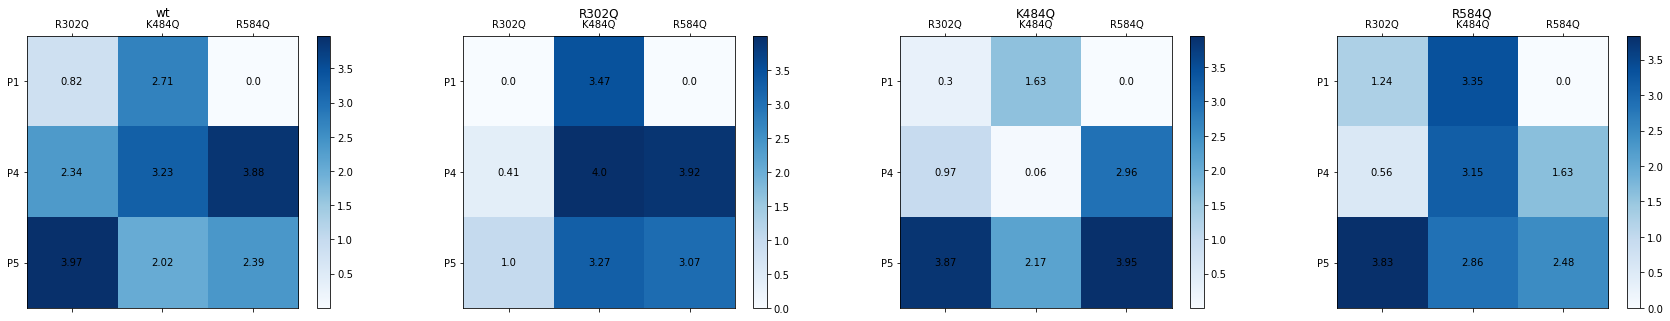

In [23]:
Dm=["wt","R302Q","K484Q","R584Q"]; #mutants
fig, axs = plt.subplots(1,4,figsize=(30,5))
for ax,d,dname in zip(axs,Dmatrix,Dm):
    im = ax.matshow(d,cmap='Blues') 
    ax.set_yticklabels(['']+phosphate)
    ax.set_title(dname)
    ax.set_xticklabels(['']+Dm[1:])
    for i in range(len(Dm[1:])):
        for j in range(len(phosphate)):
            e = d[i];
            val=e[j];
            ax.text(j, i,str(round(val, 2)), va='center', ha='center')
    plt.colorbar(im, ax=ax, cmap="YlGn")


plt.savefig("./average_contacts.png")
plt.show()
